# 3. Approche supervisée.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mytools as mt
import mlflow

## 3.1 Préparation des données.

In [4]:
mlflow.set_tracking_uri("file:///home/chakir/Bureau/PROJETS/Projet5/mlruns")

Nous allons créer une expérience **approches_supervisées** dans laquelle nous enregistrerons nos runs :

In [6]:
mlflow.set_experiment('approches_supervisees')

<Experiment: artifact_location='file:///home/chakir/Bureau/PROJETS/Projet5/mlruns/307342787120754573', creation_time=1714590821627, experiment_id='307342787120754573', last_update_time=1714590821627, lifecycle_stage='active', name='approches_supervisees', tags={}>

On charge le dataset d'entraînement :

In [11]:
data = pd.read_csv('questions_pretraitees.csv')
data.set_index('Id', inplace=True)
data.head()

,Title,Body,Tags,Score,ViewCount,AnswerCount
Id,,,,,,
26170029,touchstart touchend angularjs,element fire function code mousedown code code...,mouseup angularjs touchstart javascript mousedown,16,39388,3
21912226,find current element mouseover jquery,class current element mouseover example img sr...,mouseover jquery html javascript mouseout,26,103946,8
32974173,open git terminal mac,instal git code usr local code mac href http g...,shell git terminal bash macos,8,103356,5
2197775,use multibinding wpf combobox,drive nuts \n\n code combobox code filte...,bind wpf xaml ivalueconverter data,7,30176,3
9153571,way version package json file node code,way version set href https doc npmjs com cli c...,node version package json versione npm,921,561172,34


In [12]:
data[data.Title.isna()].shape

(1, 6)

On traite les deux valeurs manquantes comme dans le notebook précédent :

In [14]:
condition = data.Title.isna()
data.loc[condition, 'Title'] = data.loc[condition, 'Body']

In [18]:
condition = data.Body.isna()
data.loc[condition, 'Body'] = data.loc[condition, 'Title']

In [20]:
mt.valeurs_manquantes(data)

,effectif,taux


On charge les données de test :

In [23]:
data_val = pd.read_csv('questions_pretraitees_validation.csv')
data_val.set_index('Id', inplace=True)
data_val.head()

,Title,Body,Tags,Score,ViewCount,AnswerCount
Id,,,,,,
15388206,send json response fail passport authentication,code node code backend api server iphone clien...,authentication node javascript local passport,69,60579,6
8004707,responsive website iphone unwanted white space...,create responsive website notice strange behav...,iphone design responsive whitespace orientatio...,38,56345,13
27211012,send json object rest client javax client webt...,pojo give want server json xml \n\n \n\n str...,jersey- jersey java client jax rest,28,117913,1
12138339,find index specific color value image store nu...,image store numpy array yield code imread ...,multidimensional python rgb array numpy image,21,30645,1
56153726,plot nearest neighbor graph feature,new machine learning like setup little sample ...,scikit python machine plot near neighbor learn,15,45087,2


## 3.2 Classification avec Bag-of-words TF-IDF

### 3.2.1 CRÉATION DES BAG-OF-WORDS

Nous allons créer un bag-of-words d'entraînement et un bag-of-words de test. Pour que les durées d'entraînement des modèles soient raisonnables, nous allons limiter le nombre de features à 5000 :

In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [164]:
# Créer une matrice TF-IDF pour les données textuelles :
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

bow = vectorizer.fit_transform(data.Title + ' ' + data.Body)
bow_val = vectorizer.transform(data_val.Title + ' ' + data_val.Body)

X = pd.DataFrame(bow.toarray(), index=data.index, columns=vectorizer.get_feature_names_out())
X_val = pd.DataFrame(bow_val.toarray(), index=data_val.index, columns=vectorizer.get_feature_names_out())

In [165]:
X.head()

,aaa,aac,aapt,aar,ab,abc,abcd,abi,ability,able,...,zipcode,zipfile,zlib,zone,zoneddatetime,zookeeper,zoom,zsh,zxe,zygoteinit
Id,,,,,,,,,,,,,,,,,,,,,
26170029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21912226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32974173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2197775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9153571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [166]:
mt.valeurs_manquantes(X_val)

,effectif,taux


Nous allons binariser la variable cible contenant les tags. Pour la même raison que précédemment, nous allons limiter le nombre de tags au 500 tags les plus fréquents :

In [28]:
binarizer = CountVectorizer(binary=True, max_features=500, stop_words='english')

bow_cible = binarizer.fit_transform(data.Tags)
bow_val_cible = binarizer.transform(data_val.Tags)

y = pd.DataFrame(bow_cible.toarray(), index=data.index, columns=binarizer.get_feature_names_out())
y_val = pd.DataFrame(bow_val_cible.toarray(), index=data_val.index, columns=binarizer.get_feature_names_out())

In [29]:
y.shape

(25000, 500)

### 3.2.2 REGRESSION LOGISTIQUE

In [42]:
from time import time
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import jaccard_score

Tous les algorithmes que nous allons entraîner seront optimisés en maximisant le Jaccard Score et le taux de couverture des tags. Le Jaccard score représente la proportion d'éléments communs à deux ensembles. Il sera calculé en calculant la moyenne pondéré des scores de chaque colonne (option average='weighted').

In [22]:
debut = time()

classifier = OneVsRestClassifier(LogisticRegression())
classifier.fit(X, y)
y_pred = classifier.predict(X_val)

fin = time()

duree = fin - debut
print(f"Durée d'exécution : {round(duree/60)} minutes")

Durée d'exécution : 23 minutes


In [23]:
score_reference = jaccard_score(y_val, y_pred, average='weighted')
score_reference

0.28138262211568615

In [24]:
tags_pred = pd.Series(binarizer.inverse_transform(y_pred), index=data_val.index).apply(lambda x: ' '.join(x))
coverage_reference = mt.coverage_score(tags_pred, data_val.Tags)
coverage_reference

0.2112247157287006

Ces Jaccard Score et taux de couverture de référence nous serviront de baseline pour les modèles suivants.

On enregistre ce modèle dans MLflow :

In [25]:
params = {'algorithme' : 'LogisticRegression'}
metrics = {'jaccard_score' : score_reference,
           'taux_de_couverture' : coverage_reference}
tags = {'Dataset' : 'BOW_tfidf', 'algorithme' : 'LogisticRegression'}

mt.log_mlflow_run('Regression logistique (TF-IDF)', params, metrics, tags=tags, model=classifier, model_name='LogisticRegression')

### 3.2.3 SGDClassifier AVEC UNE PÉNALITÉ L2

In [47]:
debut = time()

alphas = np.logspace(-8, -4, 10)
score = []
coverage = []

for alpha in alphas:
    classifier = OneVsRestClassifier(SGDClassifier(alpha=alpha, penalty='l2', loss='log_loss', random_state=72))
    classifier.fit(X, y)
    
    y_pred = classifier.predict(X_val)
    score.append(jaccard_score(y_val, y_pred, average='weighted'))
    
    tags_pred = pd.Series(binarizer.inverse_transform(y_pred), index=data_val.index).apply(lambda x: ' '.join(x))
    coverage.append(mt.coverage_score(tags_pred, data_val.Tags))

fin = time()

duree = fin - debut
print(f"Durée d'exécution : {round(duree/60)} minutes")

Durée d'exécution : 356 minutes


/home/chakir/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chakir/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chakir/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chakir/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

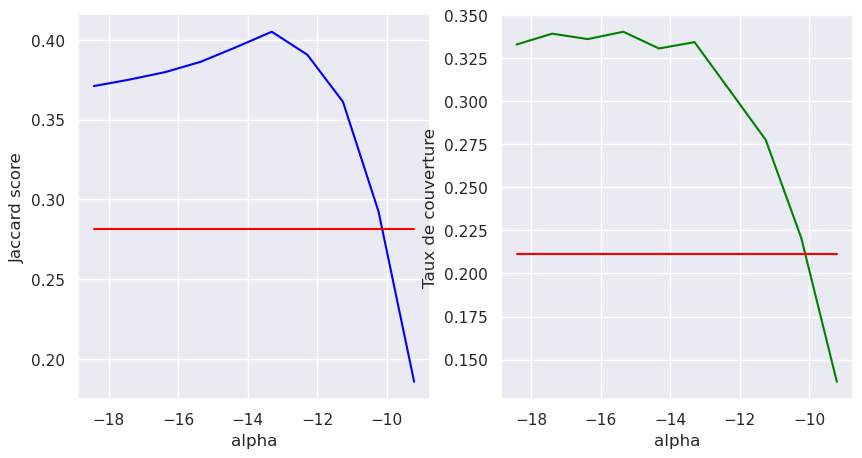

In [48]:
sns.set(style='darkgrid')
fig, axe = plt.subplots(1,2,figsize = (10,5))
axe = axe.flatten()
sns.lineplot(x=np.log(alphas), y=score, ax=axe[0], color='blue')
sns.lineplot(x=np.log(alphas), y=score_reference, ax=axe[0], color='red')
axe[0].set_xlabel('alpha')
axe[0].set_ylabel('Jaccard score')
sns.lineplot(x=np.log(alphas), y=coverage, ax=axe[1], color='green')
sns.lineplot(x=np.log(alphas), y=coverage_reference, ax=axe[1], color='red')
axe[1].set_xlabel('alpha')
axe[1].set_ylabel('Taux de couverture')
plt.savefig('Jaccard score et taux de couverture en fonction de alpha (SGD_l2_bow).png')
plt.show()

In [49]:
alpha_optimal = alphas[np.argmax(coverage)]
alpha_optimal

2.1544346900318822e-07

In [50]:
score[np.argmax(coverage)]

0.38621746777597166

In [51]:
max(coverage)

0.3404027864357682

On observe clairement un effet positif de la régularisation : On passe d'un taux de couverture de 21% à un taux de 34%. Nous allons voir si l'on peux faire mieux avec un régularisation L1.

In [188]:
classifier = OneVsRestClassifier(SGDClassifier(alpha=alpha_optimal, penalty='l2', loss='log_loss', random_state=72))
classifier.fit(X, y)

OneVsRestClassifier(estimator=SGDClassifier(alpha=2.1544346900318822e-07,
                                            loss='log_loss', random_state=72))

On enregistre ce modèle dans MLflow :

In [78]:
params = {'algorithme' : 'SGDClassifier', 'loss' : 'log_loss', 'penalty' : 'l2', 'alpha_optimal' : alpha_optimal}
metrics = {'jaccard_score' : score[np.argmax(coverage)],
           'taux_de_couverture' : max(coverage)}
tags = {'Dataset' : 'BOW_tfidf', 'algorithme' : 'SGDClassifier'}
artifacts = {'Evolution du Jaccard score et du taux de couverture en fonction de alpha' : 
             'Jaccard score et taux de couverture en fonction de alpha (SGD_l2_bow).png'}

mt.log_mlflow_run('SGDClassifier_l2 (TF-IDF)', params, metrics, tags=tags, artifacts=artifacts,\
                  model=classifier, model_name='SGDClassifier')

/home/chakir/anaconda3/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/home/chakir/anaconda3/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


### 3.2.4 SGDClassifier AVEC UNE PÉNALITÉ L1

In [81]:
debut = time()

alphas = np.logspace(-8, -4, 10)
score = []
coverage = []

for alpha in alphas:
    classifier = OneVsRestClassifier(SGDClassifier(alpha=alpha, penalty='l1', loss='log_loss', random_state=72))
    classifier.fit(X, y)
    
    y_pred = classifier.predict(X_val)
    score.append(jaccard_score(y_val, y_pred, average='weighted'))
    
    tags_pred = pd.Series(binarizer.inverse_transform(y_pred), index=data_val.index).apply(lambda x: ' '.join(x))
    coverage.append(mt.coverage_score(tags_pred, data_val.Tags))

fin = time()

duree = fin - debut
print(f"Durée d'exécution : {round(duree/60)} minutes")

Durée d'exécution : 811 minutes


/home/chakir/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chakir/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chakir/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chakir/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

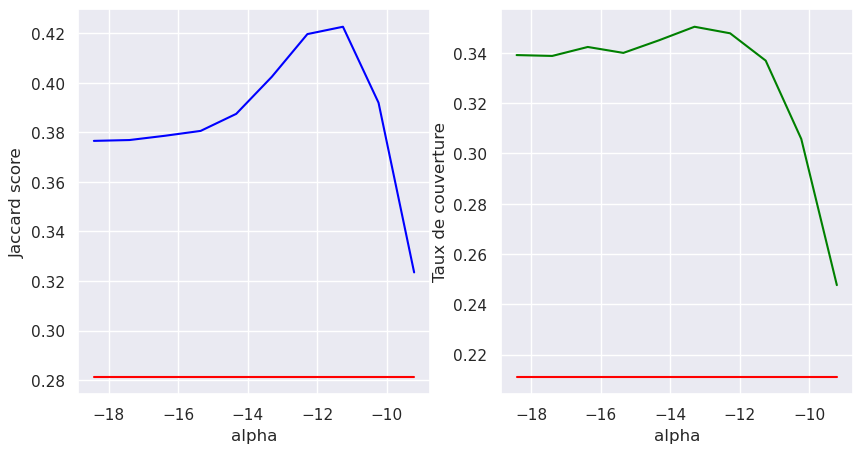

In [82]:
sns.set(style='darkgrid')
fig, axe = plt.subplots(1,2,figsize = (10,5))
axe = axe.flatten()
sns.lineplot(x=np.log(alphas), y=score, ax=axe[0], color='blue')
sns.lineplot(x=np.log(alphas), y=score_reference, ax=axe[0], color='red')
axe[0].set_xlabel('alpha')
axe[0].set_ylabel('Jaccard score')
sns.lineplot(x=np.log(alphas), y=coverage, ax=axe[1], color='green')
sns.lineplot(x=np.log(alphas), y=coverage_reference, ax=axe[1], color='red')
axe[1].set_xlabel('alpha')
axe[1].set_ylabel('Taux de couverture')
plt.savefig('Jaccard score et taux de couverture en fonction de alpha (SGD_l1_bow).png')
plt.show()

In [83]:
alpha_optimal = alphas[np.argmax(coverage)]
alpha_optimal

1.6681005372000591e-06

In [84]:
score[np.argmax(coverage)]

0.4024134296637863

In [92]:
max(coverage)

0.35036893217891496

In [196]:
classifier = OneVsRestClassifier(SGDClassifier(alpha=alpha_optimal, penalty='l1', loss='log_loss', random_state=72))
classifier.fit(X, y)

OneVsRestClassifier(estimator=SGDClassifier(alpha=1.6681005372000591e-06,
                                            loss='log_loss', penalty='l1',
                                            random_state=72))

In [94]:
params = {'algorithme' : 'SGDClassifier', 'loss' : 'log_loss', 'penalty' : 'l1', 'alpha_optimal' : alpha_optimal}
metrics = {'jaccard_score' : score[np.argmax(coverage)],
           'taux_de_couverture' : max(coverage)}
tags = {'Dataset' : 'BOW_tfidf', 'algorithme' : 'SGDClassifier'}
artifacts = {'Evolution du Jaccard score et du taux de couverture en fonction de alpha' : 
             'Jaccard score et taux de couverture en fonction de alpha (SGD_l1_bow).png'}

mt.log_mlflow_run('SGDClassifier_l1 (TF-IDF)', params, metrics, tags=tags, artifacts=artifacts,\
                  model=classifier, model_name='SGDClassifier')

/home/chakir/anaconda3/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/home/chakir/anaconda3/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


## 3.3 Classification avec Embedding Word2Vec

### 3.3.1 CRÉATION DES EMBEDDINGS

In [32]:
from gensim.models import Word2Vec

Nous allons représenter chaque 'titre + question' par un vecteur de taille 100 avec Word2Vec. Le modèle Word2Vec sera entraîné uniquement sur les titres et les questions du dataset d'entraînement.

Nous utiliserons ensuite les embeddings obtenus pour entraîner les mêmes modèles que ceux entraînés avec les bag-of-words précédents.

In [35]:
sentences = [title.split() for title in data.Title] + [question.split() for question in data.Body]
embedding = Word2Vec(sentences, vector_size=100, min_count=1, sg=1, window=7)

In [36]:
embedding.wv.most_similar('tensorflow')

[('keras', 0.8336083292961121),
 ('kera', 0.8083258271217346),
 ('pytorch', 0.7873112559318542),
 ('theano', 0.7819665670394897),
 ('vgg', 0.7774200439453125),
 ('estimator', 0.7772973775863647),
 ('futurewarning', 0.7729784846305847),
 ('tensorboard', 0.7696813941001892),
 ('factorization', 0.7695174217224121),
 ('scikit', 0.7676658630371094)]

La fonction ci-dessous permet d'obtenir l'embedding d'un document à partir de l'embedding de chacun de ses tokens :

In [38]:
def get_vector(embedding, text):
    return np.mean([embedding.wv[word] for word in text.split() if word in embedding.wv], axis=0)

On calcule les embeddings de chaque 'titre + question' des datasets d'entraînement et de test.

In [40]:
X = pd.DataFrame((data.Title + ' ' + data.Body).apply(lambda x: get_vector(embedding, x)).tolist(), index=data.index)
X_val = pd.DataFrame((data_val.Title + ' ' + data_val.Body).apply(lambda x: get_vector(embedding, x)).tolist(), index=data_val.index)

In [41]:
X.shape

(25000, 100)

### 3.3.2 RÉGRESSION LOGISTIQUE

In [108]:
debut = time()

classifier = OneVsRestClassifier(LogisticRegression())
classifier.fit(X, y)
y_pred = classifier.predict(X_val)

fin = time()

duree = fin - debut
print(f"Durée d'exécution : {round(duree/60)} minutes")

Durée d'exécution : 1 minutes


In [109]:
score_reference = jaccard_score(y_val, y_pred, average='weighted')
score_reference

0.23749695193199377

In [110]:
tags_pred = pd.Series(binarizer.inverse_transform(y_pred), index=data_val.index).apply(lambda x: ' '.join(x))
coverage_reference = mt.coverage_score(tags_pred, data_val.Tags)
coverage_reference

0.18739467965366838

In [115]:
params = {'algorithme' : 'LogisticRegression'}
metrics = {'jaccard_score' : score_reference,
           'taux_de_couverture' : coverage_reference}
tags = {'Dataset' : 'Word2Vec', 'algorithme' : 'SGDClassifier'}

mt.log_mlflow_run('Regression logistique (Word2Vec)', params, metrics, tags=tags, model=classifier, model_name='LogisticRegression')

### 3.3.3 SGDClassifier AVEC UNE PÉNALITÉ L2

In [119]:
debut = time()

alphas = np.logspace(-8, -4, 10)
score = []
coverage = []

for alpha in alphas:
    classifier = OneVsRestClassifier(SGDClassifier(alpha=alpha, penalty='l2', loss='log_loss', random_state=72))
    classifier.fit(X, y)
    
    y_pred = classifier.predict(X_val)
    score.append(jaccard_score(y_val, y_pred, average='weighted'))
    
    tags_pred = pd.Series(binarizer.inverse_transform(y_pred), index=data_val.index).apply(lambda x: ' '.join(x))
    coverage.append(mt.coverage_score(tags_pred, data_val.Tags))

fin = time()

duree = fin - debut
print(f"Durée d'exécution : {round(duree/60)} minutes")

Durée d'exécution : 30 minutes


/home/chakir/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chakir/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chakir/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chakir/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

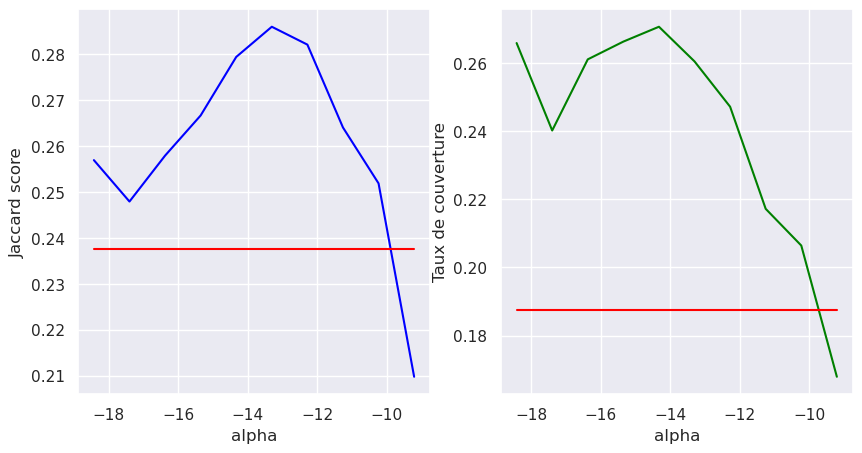

In [120]:
sns.set(style='darkgrid')
fig, axe = plt.subplots(1,2,figsize = (10,5))
axe = axe.flatten()
sns.lineplot(x=np.log(alphas), y=score, ax=axe[0], color='blue')
sns.lineplot(x=np.log(alphas), y=score_reference, ax=axe[0], color='red')
axe[0].set_xlabel('alpha')
axe[0].set_ylabel('Jaccard score')
sns.lineplot(x=np.log(alphas), y=coverage, ax=axe[1], color='green')
sns.lineplot(x=np.log(alphas), y=coverage_reference, ax=axe[1], color='red')
axe[1].set_xlabel('alpha')
axe[1].set_ylabel('Taux de couverture')
plt.savefig('Jaccard score et taux de couverture en fonction de alpha (SGD_l2_w2v).png')
plt.show()

In [121]:
alpha_optimal = alphas[np.argmax(coverage)]
alpha_optimal

5.994842503189409e-07

In [122]:
score[np.argmax(coverage)]

0.279410102120984

In [123]:
max(coverage)

0.27072538816736935

In [219]:
classifier = OneVsRestClassifier(SGDClassifier(alpha=alpha_optimal, penalty='l2', loss='log_loss', random_state=72))
classifier.fit(X, y)

OneVsRestClassifier(estimator=SGDClassifier(alpha=5.994842503189409e-07,
                                            loss='log_loss', random_state=72))

In [124]:
params = {'algorithme' : 'SGDClassifier', 'loss' : 'log_loss', 'penalty' : 'l2', 'alpha_optimal' : alpha_optimal}
metrics = {'jaccard_score' : score[np.argmax(coverage)],
           'taux_de_couverture' : max(coverage)}
tags = {'Dataset' : 'Word2Vec', 'algorithme' : 'SGDClassifier'}
artifacts = {'Evolution du Jaccard score et du taux de couverture en fonction de alpha' : 
             'Jaccard score et taux de couverture en fonction de alpha (SGD_l2_w2v).png'}

mt.log_mlflow_run('SGDClassifier_l2 (Word2Vec)', params, metrics, tags=tags, artifacts=artifacts,\
                  model=classifier, model_name='SGDClassifier')

/home/chakir/anaconda3/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/home/chakir/anaconda3/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


### 3.3.4 SGDClassifier AVEC UNE PÉNALITÉ L1

In [129]:
debut = time()

alphas = np.logspace(-8, -4, 10)
score = []
coverage = []

for alpha in alphas:
    classifier = OneVsRestClassifier(SGDClassifier(alpha=alpha, penalty='l1', loss='log_loss', random_state=72))
    classifier.fit(X, y)
    
    y_pred = classifier.predict(X_val)
    score.append(jaccard_score(y_val, y_pred, average='weighted'))
    
    tags_pred = pd.Series(binarizer.inverse_transform(y_pred), index=data_val.index).apply(lambda x: ' '.join(x))
    coverage.append(mt.coverage_score(tags_pred, data_val.Tags))

fin = time()

duree = fin - debut
print(f"Durée d'exécution : {round(duree/60)} minutes")

Durée d'exécution : 67 minutes


/home/chakir/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chakir/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chakir/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chakir/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

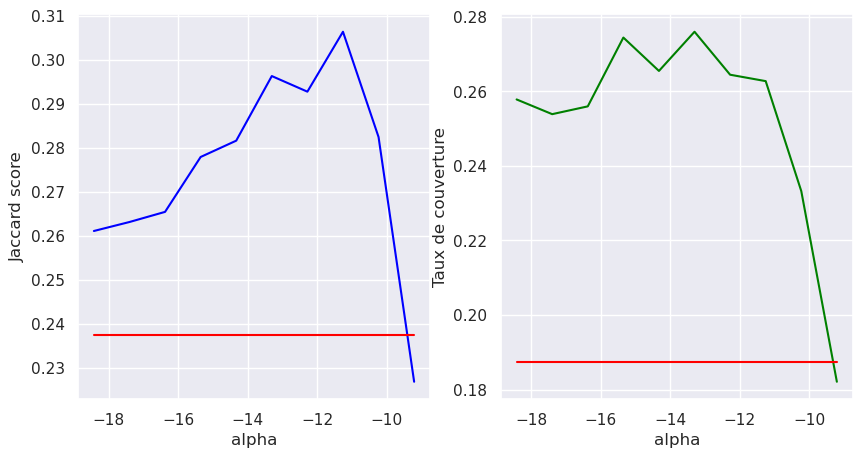

In [130]:
sns.set(style='darkgrid')
fig, axe = plt.subplots(1,2,figsize = (10,5))
axe = axe.flatten()
sns.lineplot(x=np.log(alphas), y=score, ax=axe[0], color='blue')
sns.lineplot(x=np.log(alphas), y=score_reference, ax=axe[0], color='red')
axe[0].set_xlabel('alpha')
axe[0].set_ylabel('Jaccard score')
sns.lineplot(x=np.log(alphas), y=coverage, ax=axe[1], color='green')
sns.lineplot(x=np.log(alphas), y=coverage_reference, ax=axe[1], color='red')
axe[1].set_xlabel('alpha')
axe[1].set_ylabel('Taux de couverture')
plt.savefig('Jaccard score et taux de couverture en fonction de alpha (SGD_l1_w2v).png')
plt.show()

In [131]:
alpha_optimal = alphas[np.argmax(coverage)]
alpha_optimal

1.6681005372000591e-06

In [132]:
score[np.argmax(coverage)]

0.29629004105830437

In [133]:
max(coverage)

0.27600773593071476

In [225]:
classifier = OneVsRestClassifier(SGDClassifier(alpha=alpha_optimal, penalty='l1', loss='log_loss', random_state=72))
classifier.fit(X, y)

OneVsRestClassifier(estimator=SGDClassifier(alpha=1.6681005372000591e-06,
                                            loss='log_loss', penalty='l1',
                                            random_state=72))

In [134]:
params = {'algorithme' : 'SGDClassifier', 'loss' : 'log_loss', 'penalty' : 'l1', 'alpha_optimal' : alpha_optimal}
metrics = {'jaccard_score' : score[np.argmax(coverage)],
           'taux_de_couverture' : max(coverage)}
tags = {'Dataset' : 'Word2Vec', 'algorithme' : 'SGDClassifier'}
artifacts = {'Evolution du Jaccard score et du taux de couverture en fonction de alpha' : 
             'Jaccard score et taux de couverture en fonction de alpha (SGD_l1_w2v).png'}

mt.log_mlflow_run('SGDClassifier_l1 (Word2Vec)', params, metrics, tags=tags, artifacts=artifacts,\
                  model=classifier, model_name='SGDClassifier')

/home/chakir/anaconda3/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/home/chakir/anaconda3/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


### 3.3.5 FORÊT ALÉATOIRE

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
debut = time()

n_estimators = range(50, 501, 50)
score = []
coverage = []

for n in n_estimators:
    classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=n, random_state=72))
    classifier.fit(X, y)
    
    y_pred = classifier.predict(X_val)
    score.append(jaccard_score(y_val, y_pred, average='weighted'))
    
    tags_pred = pd.Series(binarizer.inverse_transform(y_pred), index=data_val.index).apply(lambda x: ' '.join(x))
    coverage.append(mt.coverage_score(tags_pred, data_val.Tags))

fin = time()

duree = fin - debut
print(f"Durée d'exécution : {round(duree/60)} minutes")

/home/chakir/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chakir/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chakir/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chakir/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

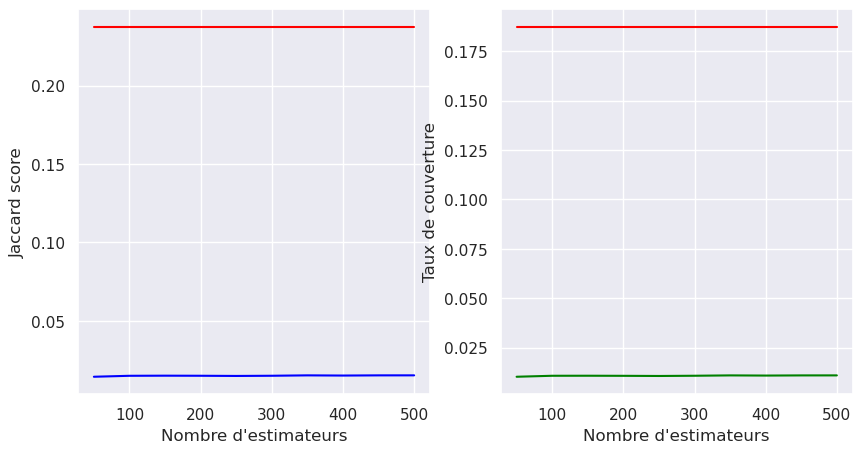

In [138]:
sns.set(style='darkgrid')
fig, axe = plt.subplots(1,2,figsize = (10,5))
axe = axe.flatten()
sns.lineplot(x=n_estimators, y=score, ax=axe[0], color='blue')
sns.lineplot(x=n_estimators, y=score_reference, ax=axe[0], color='red')
axe[0].set_xlabel("Nombre d'estimateurs")
axe[0].set_ylabel('Jaccard score')
sns.lineplot(x=n_estimators, y=coverage, ax=axe[1], color='green')
sns.lineplot(x=n_estimators, y=coverage_reference, ax=axe[1], color='red')
axe[1].set_xlabel("Nombre d'estimateurs")
axe[1].set_ylabel('Taux de couverture')
plt.savefig("Jaccard score et taux de couverture en fonction du nombre d'estimateurs (random_forest).png")
plt.show()

In [139]:
n_optimal = n_estimators[np.argmax(coverage)]
n_optimal

500

In [140]:
score[np.argmax(coverage)]

0.015200553706228845

In [141]:
max(coverage)

0.011003285714285568

In [ ]:
params = {'algorithme' : 'RandomForestClassifier', 'n_estimators_optimal' : n_optimal, 'max_depth' : 5}
metrics = {'jaccard_score' : score[np.argmax(coverage)],
           'taux_de_couverture' : max(coverage)}
tags = {'Dataset' : 'Word2Vec', 'algorithme' : 'RandomForestClassifier'}
artifacts = {"Evolution du Jaccard score et du taux de couverture en fonction du nombre d'estimateurs" : 
             "Jaccard score et taux de couverture en fonction du nombre d'estimateurs (random_forest).png"}

mt.log_mlflow_run('RandomForestClassifier (Word2Vec)', params, metrics, tags=tags, artifacts=artifacts,\
                  model=classifier, model_name='RandomForestClassifier')

#### ARBRE DE DÉCISION

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
debut = time()

max_depth = range(5,51,5)
score = []
coverage = []

for depth in max_depth:
    classifier = DecisionTreeClassifier(max_depth=depth, random_state=72)
    classifier.fit(X, y)
    
    y_pred = classifier.predict(X_val)
    score.append(jaccard_score(y_val, y_pred, average='weighted'))
    
    tags_pred = pd.Series(binarizer.inverse_transform(y_pred), index=data_val.index).apply(lambda x: ' '.join(x))
    coverage.append(mt.coverage_score(tags_pred, data_val.Tags))

fin = time()

duree = fin - debut
print(f"Durée d'exécution : {round(duree/60)} minutes")

Durée d'exécution : 430 minutes


/home/chakir/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chakir/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chakir/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chakir/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

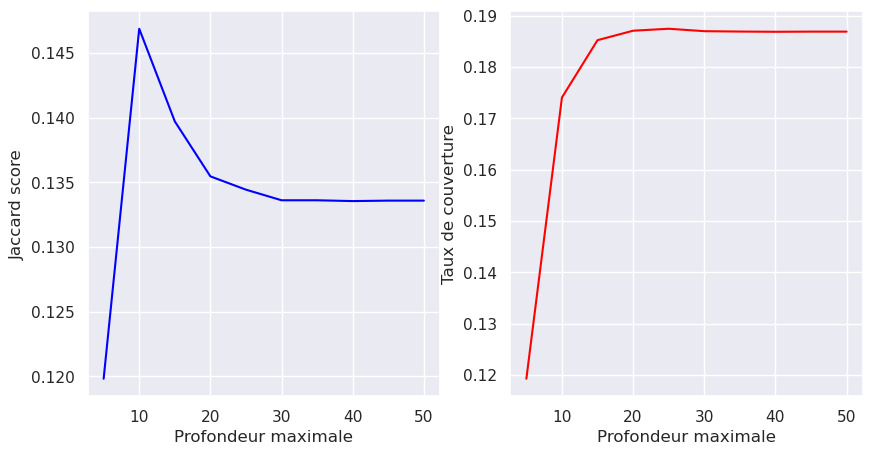

In [74]:
sns.set(style='darkgrid')
fig, axe = plt.subplots(1,2,figsize = (10,5))
axe = axe.flatten()
sns.lineplot(x=max_depth, y=score, ax=axe[0], color='blue')
axe[0].set_xlabel('Profondeur maximale')
axe[0].set_ylabel('Jaccard score')
sns.lineplot(x=max_depth, y=coverage, ax=axe[1], color='red')
axe[1].set_xlabel('Profondeur maximale')
axe[1].set_ylabel('Taux de couverture')
plt.savefig('Jaccard score et taux de couverture en fonction de la profondeur maximale.png')
plt.show()

In [ ]:
params = {'algorithme' : 'DecisionTreeClassifier (Optimisation)', 'max_depth' : 'De 5 à 50 avec un pas de 5'}
metrics = {'Durée en minutes' : round(duree/60)}
tags = {'Dataset' : 'word2vec_100', 'algorithme' : 'DecisionTreeClassifier'}
artifacts = {'Evolution du Jaccard score et du taux de couverture en fonction de max_depth' : 
             'Jaccard score et taux de couverture en fonction de la profondeur maximale.png'}

mt.log_mlflow_run("Recherche d'un arbre de décision optimal", params, metrics, tags=tags, artifacts=artifacts)

In [102]:
classifier = DecisionTreeClassifier(max_depth=15, random_state=72)
classifier.fit(X, y)

y_pred = classifier.predict(X_val)
jaccard_score(y_val, y_pred, average='weighted')

0.11080238105118247

In [104]:
tags_pred = pd.Series(binarizer.inverse_transform(y_pred), index=data_val.index).apply(lambda x: ' '.join(x))
mt.coverage_score(tags_pred, data_val.Tags)

0.12180654689754392

In [ ]:
classifier = OneVsRestClassifier(SGDClassifier(random_state=72))
classifier.fit(X, y)

In [100]:
y_pred = classifier.predict(X_val)
jaccard_score(y_val, y_pred, average='weighted')

0.18972308712210384

### BERT

In [11]:
import torch
from transformers import BertTokenizer, BertModel # Charger le tokenizer et le modèle BERT

In [9]:
new_data = data.iloc[:1000,:]

In [15]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

inputs = tokenizer((new_data.Title + ' ' + new_data.Body).tolist(), padding=True, truncation=True, return_tensors="pt")
inputs_tags = tokenizer(new_data.Tags.tolist(), padding=True, truncation=True, return_tensors="pt")

In [ ]:
# Obtenir les embeddings de la couche cachée finale (last_hidden_state)
with torch.no_grad():
    outputs = model(**inputs)
    outputs_tags = bert(**inputs_tags)

# Récupérer les embeddings de la couche cachée finale
bert = outputs.last_hidden_state
bert_tags = outputs_tags.last_hidden_state

In [6]:
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf

/home/chakir/anaconda3/envs/TensorFlow/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-05-09 11:44:43.247678: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/chakir/anaconda3/envs/TensorFlow/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/home/chakir/anaconda3/envs/TensorFlow/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: to

In [7]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

2024-05-09 11:44:47.776633: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model)

In [16]:
#inputs = tokenizer((new_data.Title + ' ' + new_data.Body).tolist(), padding=True, truncation=True, max_length=50, return_tensors="tf")
inputs_tags = tokenizer(new_data.Tags.tolist(), padding=True, truncation=True, return_tensors="tf")

In [11]:
outputs = bert_model(inputs)

last_hidden_states = outputs.last_hidden_state[-1]

In [17]:
outputs_tags = bert_model(inputs_tags)

last_hidden_states_tags = outputs_tags.last_hidden_state[-1]

In [18]:
last_hidden_states_tags

<tf.Tensor: shape=(23, 768), dtype=float32, numpy=
array([[-0.27977768,  0.00781763, -0.09879584, ..., -0.40626803,
        -0.20007344,  0.68300325],
       [ 0.6945271 ,  0.20923242, -0.28861135, ..., -0.36736977,
         0.6534235 ,  0.40684155],
       [ 0.85177886,  0.20802724,  0.322501  , ..., -0.4327043 ,
         0.44412726,  0.98807204],
       ...,
       [ 0.169978  , -0.67774   , -0.25016797, ..., -0.6109454 ,
        -0.08246522,  0.26081488],
       [ 0.24173681, -0.54414755, -0.09644023, ..., -0.58613575,
        -0.10237333,  0.16927038],
       [ 0.28070542, -0.49880344, -0.01149642, ..., -0.5250648 ,
        -0.11089109,  0.12507842]], dtype=float32)>

In [22]:
bert_emb = pd.DataFrame(last_hidden_states.numpy())

In [23]:
bert_emb.shape

(38, 768)

### USE

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf

embedding = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")

# Obtenir les embeddings des questions
use = embedding((new_data.Title + ' ' + new_data.Body).tolist())
use_tags = embedding((new_data.Tags).tolist())

2024-05-07 20:16:42.677718: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 977971200 exceeds 10% of free system memory.
2024-05-07 20:16:42.683347: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 977971200 exceeds 10% of free system memory.
2024-05-07 20:16:43.793119: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 977971200 exceeds 10% of free system memory.
2024-05-07 20:16:43.793192: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 977971200 exceeds 10% of free system memory.
2024-05-07 20:16:44.318014: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 977971200 exceeds 10% of free system memory.


In [2]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

2024-05-07 20:17:59.621910: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-07 20:18:00.700423: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/chakir/anaconda3/lib/python3.11/site-packages/transformers/deepspeed.py:23: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(
/home/chakir/anaconda3/lib/python3.11/site-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
 